In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings

In [2]:
data = pd.read_csv('dataset.csv')

#### Imputing missing values

In [3]:
cat_list = ['location_region', 'location_state','customer_value','gender','device_type','device_manufacturer']
for a in cat_list:
    data[a].fillna('unspecified',inplace=True)
    
    
num_list = ['spend_total', 'spend_vas', 'spend_voice', 'spend_data','xtra_data_talk_rev', 'customer_class','age']
for b in num_list:
    data[b].fillna(data[b].median(), inplace=True)

data['sms_cost'].fillna(value=0, inplace=True)
data['event_type'].fillna(data['event_type'].mode()[0], inplace=True)

### Outliers

#### Categorical variables

In [4]:
for j in data['device_manufacturer']:
    if j == 'tecno':
        j = j
    elif j == 'itel':
        j= j
    elif j == 'infinix':
        j= j
    elif j == 'samsung':
        j= j
    elif j == 'nokia':
        j= j
    elif j == 'apple':
        j= j
    else:
        data['device_manufacturer'].replace(j,'others',inplace=True)

In [5]:
for k in data['event_type']:
    if k == 'Click':
        data['event_type'].replace(k,1,inplace=True)
    else:
        data['event_type'].replace(k,0,inplace=True)

#### Ordinal Variable 
There is a clear ordering in the Customer_value variable

In [6]:
for l in data['customer_value']:
    if l == 'low' :
        data['customer_value'].replace(l,1,inplace=True)
    elif l == 'medium':
        data['customer_value'].replace(l,2,inplace=True)
    elif l == 'high' :
        data['customer_value'].replace(l,3,inplace=True)
    elif l == 'very high' :
        data['customer_value'].replace(l,4,inplace=True)
    elif l == 'top' :
        data['customer_value'].replace(l,5,inplace=True)
    else:
        data['customer_value'].replace(l,0,inplace=True)

In [8]:
data = pd.get_dummies(data, columns=cat_list, dummy_na=True)

In [9]:
list = ['msisdn', 'location_lga','location_city', 'os_name','os_version',
       'ad_id', 'ad_name', '@timestamp', 'event_type']
y = data.loc[:,'event_type']
X = data.drop(list,axis = 1)

In [13]:
X.columns

Index(['spend_total', 'spend_vas', 'spend_voice', 'spend_data', 'sms_cost',
       'xtra_data_talk_rev', 'customer_class', 'age',
       'location_region_North Central', 'location_region_North East',
       'location_region_North West', 'location_region_South East',
       'location_region_South South', 'location_region_South West',
       'location_region_unspecified', 'location_region_nan',
       'location_state_abia', 'location_state_adamawa',
       'location_state_akwa ibom', 'location_state_anambra',
       'location_state_bauchi', 'location_state_bayelsa',
       'location_state_benue', 'location_state_borno',
       'location_state_cross river', 'location_state_delta',
       'location_state_ebonyi', 'location_state_edo', 'location_state_ekiti',
       'location_state_enugu', 'location_state_fct', 'location_state_gombe',
       'location_state_imo', 'location_state_jigawa', 'location_state_kaduna',
       'location_state_kano', 'location_state_katsina', 'location_state_kebbi',

In [10]:
from sklearn.model_selection import train_test_split
# split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Precision: 0.763
Recall: 0.173


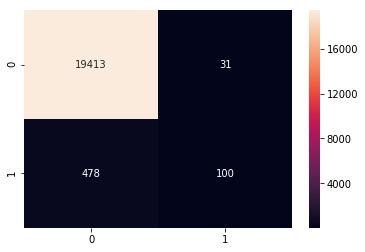

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,recall_score,precision_score

rf = RandomForestClassifier(random_state=43)      
rf = rf.fit(X_train,y_train)


cm = confusion_matrix(y_test,rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

print("Precision: %.3f" % precision_score(y_test, rf.predict(X_test)))
print("Recall: %.3f" % recall_score(y_test, rf.predict(X_test)))

In [14]:
# saving the model
import pickle
with open('model/model.pkl','wb') as file:
    pickle.dump(rf, file)

In [15]:
# saving the columns
model_columns = X.columns
with open('model/model_columns.pkl','wb') as file:
    pickle.dump(model_columns, file)